In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## (1) Data Description:

Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

## 1.0 Overall Description of Data Files & Structure
There are 2 datasets `players.csv` and `sessions.csv` which contain observations to better understand player behaviour and session activity on a Minecraft research server.

## 1.1 Descriptions of `players.csv` Dataset

The `players` dataset contains 196 observations (players) 7 variables and can be further described by the nature of the observation's variables. This dataset gives insight into the demographic of players in the research Minecraft server. The data here is wither qualitative (speaking to the initial state of the player as they joined, current age, experience etc.) or cumulative (time played). Any player's session data found in `session.csv` can be found using the hashemail identifier. 


### 1.2 Quantitive Summaries of `players.csv` Dataset

In [2]:
players <- read_csv("./data/players.csv")
players_observations <- players |> 
    summarise(
        #--- Dataset Observations
        N_players = n(),                                          #Number of players
        #--- Age Observations
        Age_Mean = round(mean(Age, na.rm = TRUE), 2),             #Mean age to 2 sf 
        Age_SD = round(sd(Age, na.rm = TRUE), 2),                 #Standard deviation of age to 2 sf
        Age_Min = min(Age, na.rm = TRUE),                         #Minimum Age (youngest) 
        Age_Median = median(Age, na.rm = TRUE),                   #Median age (most common)
        Age_Max = max(Age, na.rm = TRUE),                         #Maximum age (oldest person)
        #--- Played Hours Observations
        Hours_Mean = round(mean(played_hours, na.rm = TRUE), 2),  #Mean amount of hours played to 2 sf
        Hours_SD = round(sd(played_hours, na.rm = TRUE), 2),      #Standard deviation of hours played to 2 sf
        Hours_Min = min(played_hours, na.rm = TRUE),              #Lowest playtime
        Hours_Median = median(played_hours, na.rm = TRUE),        #Median playtime
        Hours_Max = max(played_hours, na.rm = TRUE)               #Maximum playtime
      )

players_observations 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


N_players,Age_Mean,Age_SD,Age_Min,Age_Median,Age_Max,Hours_Mean,Hours_SD,Hours_Min,Hours_Median,Hours_Max
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,21.14,7.39,9,19,58,5.85,28.36,0,0.1,223.1


`age` is a quantitative data type that describes the player's age.
- The mean age is 21.24 years, the standard deviation of age is 7.39 years
- The median age is 19, the maximum age is 58 years, the minimum age is 9 years. 

`played_hours` is a quantitative data type that totals the amount of cumulative hours a player has been online for.
- The mean session is 5.85 hours, the standard deviation is 28.36 hours.
- The minimum playtime is 0.00 hours, the median playtime is 0.10 hours, and the maximum playtime is 223.10 hours


### 1.3 Qualitative Summaries of`players.csv` Dataset

In [3]:
#Experience Level
experience_summary <- players |>
  group_by(experience) |>
  summarise(Count = n()) |>
  ungroup() |>
  mutate(
    Proportion = round(Count / sum(Count) * 100, 2),
    Proportion_Label = paste0(Proportion, "%")
  ) |>
  arrange(desc(Count))

#Subscription stat
subscribe_summary <- players |>
  group_by(subscribe) |>
  summarise(Count = n()) |>
  ungroup() |>
  mutate(
    Proportion = round(Count / sum(Count) * 100, 2),
    Proportion_Label = paste0(Proportion, "%")
  ) |>
  arrange(desc(Count))

#Gender distrbution
gender_summary <- players |>
  group_by(gender) |>
  summarise(Count = n()) |>
  ungroup() |>
  mutate(
    Proportion = round(Count / sum(Count) * 100, 2),
    Proportion_Label = paste0(Proportion, "%")
  ) |>
  arrange(desc(Count))

experience_summary
subscribe_summary 
print(gender_summary, n=7) #print used to see all gender categories 

experience,Count,Proportion,Proportion_Label
<chr>,<int>,<dbl>,<chr>
Amateur,63,32.14,32.14%
Veteran,48,24.49,24.49%
Regular,36,18.37,18.37%
Beginner,35,17.86,17.86%
Pro,14,7.14,7.14%


subscribe,Count,Proportion,Proportion_Label
<lgl>,<int>,<dbl>,<chr>
TRUE,144,73.47,73.47%
FALSE,52,26.53,26.53%


# A tibble: 7 × 4
  gender            Count Proportion Proportion_Label
  <chr>             <int>      <dbl> <chr>           
1 Male                124      63.3  63.27%          
2 Female               37      18.9  18.88%          
3 Non-binary           15       7.65 7.65%           
4 Prefer not to say    11       5.61 5.61%           
5 Two-Spirited          6       3.06 3.06%           
6 Agender               2       1.02 1.02%           
7 Other                 1       0.51 0.51%           


`experience` is a categorical data type that describes the self proclaimed "experience" level of the player. 
- 63 Amateur players make up 32.14% of the player base.
- 48 Veteran players make up 24.49% of the player base.
- 36 Regular players make up 18.37% of the player base.
- 35 Beginner player make up 17.86% of the player base.
- 35 Beginner players make up 17.86% of the player base. 

`subscribe` is a boolean data type that describes whether the player is subscribed to the game related news letter. 
- 144 of the players are subscribed, making up 73.47% of the player base.
- 52 of the players are not subscribed, and make up the remaining 26.53% of the player base.

`gender` is a categorical data type that describes their gender identity {Male, Female, Non-binary, Prefer not to say, Two-Spirited, Other}
- There are 124 males = 63.27% of the players.
- There are 37 females = 18.88% of the players.
- There are 15 non-binary players = 7.65% of the players.
- There are 11 who prefer no to say = 5.61% of the players.
- There are 6 two-spirit players = 3.06% of the players.
- There are 2 agender players = 1.02% of the players.
- There is 1 person who does not identify with any of the aforementioned categories = 0.51% of players. 

### 1.4 Other Variables

- `hashedEmail` is an identifier data type that is used to ID a player by hashing their email. Summaries cannot really be performed on this without a known hash function (not useful for data analysis in this context). 
- `name` is a string datatype describing the player's first name.

## 1.5 Variable Descriptions of `sessions.csv` Dataset 

There were a total of 1533 sessions (observations), consisting of 5 variables in the `sessions.csv` dataset. Each of which gives insight into the nature of the data:

### 1.6 Quantitive Summaries of `sessions.csv` Dataset 

In [5]:
sessions <- read_csv("./data/sessions.csv") |> 
    mutate(
    start_time_dt = dmy_hm(start_time),
    end_time_dt = dmy_hm(end_time),
    # Calculate session duration in minutes
    session_duration_minutes = as.numeric(difftime(end_time_dt, start_time_dt, units = "mins"))) |> 
    # Filter out rows where time conversion failed or duration is negative/zero
    filter(!is.na(start_time_dt) & !is.na(end_time_dt) & session_duration_minutes > 0)

sessions_summary <- sessions |>
  summarise(
    # --- Dataset observations
    N_sessions = n(),                                                         #Number of sessions (observations)
    Time_Range_Start = min(start_time_dt, na.rm = TRUE),                      #Earliest time of start session
    Time_Range_End = max(end_time_dt, na.rm = TRUE),                          #Latests end time of session 
    # --- Summary for session_duration_minutes
    Duration_Mean = round(mean(session_duration_minutes, na.rm = TRUE), 2),   #Average playtime
    Duration_SD = round(sd(session_duration_minutes, na.rm = TRUE), 2),       #Playtime session stanard deviation 
    Duration_Min = min(session_duration_minutes, na.rm = TRUE),               #Minimum session time (shortest playing session)
    Duration_Median = median(session_duration_minutes, na.rm = TRUE),         #Median playtime session (most common amount of time spent playing) 
    Duration_Max = max(session_duration_minutes, na.rm = TRUE)                #Maximum session time (longest playing session) 
  )

sessions_summary

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


N_sessions,Time_Range_Start,Time_Range_End,Duration_Mean,Duration_SD,Duration_Min,Duration_Median,Duration_Max
<int>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1533,2024-04-06 09:27:00,2024-09-26 07:39:00,50.86,55.57,3,30,259


- `start_time`, `end_time` are Datatimes (strings) that mark the exact starting time `start_time`, to the end time of the session `end_time` in the format DD/MM/YYYY HH:MM
- `original_start_time`, `original_end_time` is a more precise measure of the starting and end times. 

### 1.7 Other Variables 
- `hashedEmail` is an identifier data type that is used to ID a player by hashing their email. (This is used in both data sets, and similar to the variable of the same name described in 1.4) 


## (2) Questions:

Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

### 2.0 General Question type
I will choose Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts = High Data Contributor (Player Type). 

### 2.1 My Specific Question
Can player characteristics such as age, experience level, and subscription status predict if the player is a "high data contributor" (if they have more than 10 cumulative hours logged. 

First I will wrangle the data. Then I will see which of  *age*, *experience*, and *subscribe* (*explanatory variable*) to predict a new binary variable, *high_contributor* (*response variable*) derived from the played hours colum in players.csv dataset. I plan on trying to use both logistic regression (to estimate a play time, and thus a high_contribution status) and knn classification to see which more accurate metrics. 

## (3) Exploratory Data Analysis and Visualization

In this assignment, you will:

- Demonstrate that the dataset can be loaded into R.
- Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
- Make a few exploratory visualizations of the data to help you understand it.
- Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
- Explain any insights you gain from these plots that are relevant to address your question

Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

### 3.0 Fresh data sample analysis

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


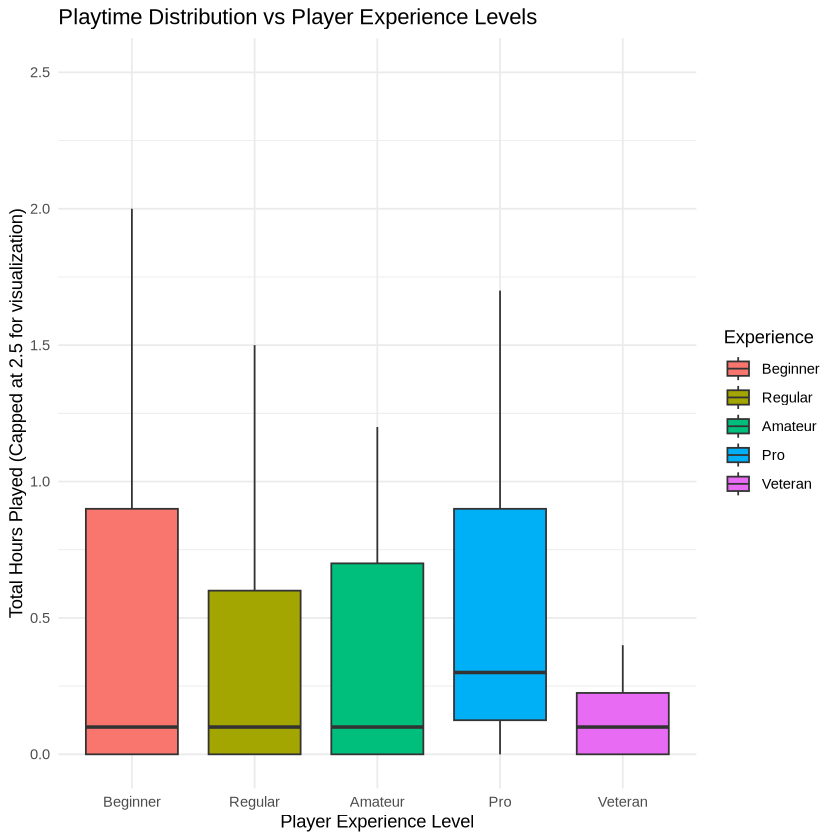

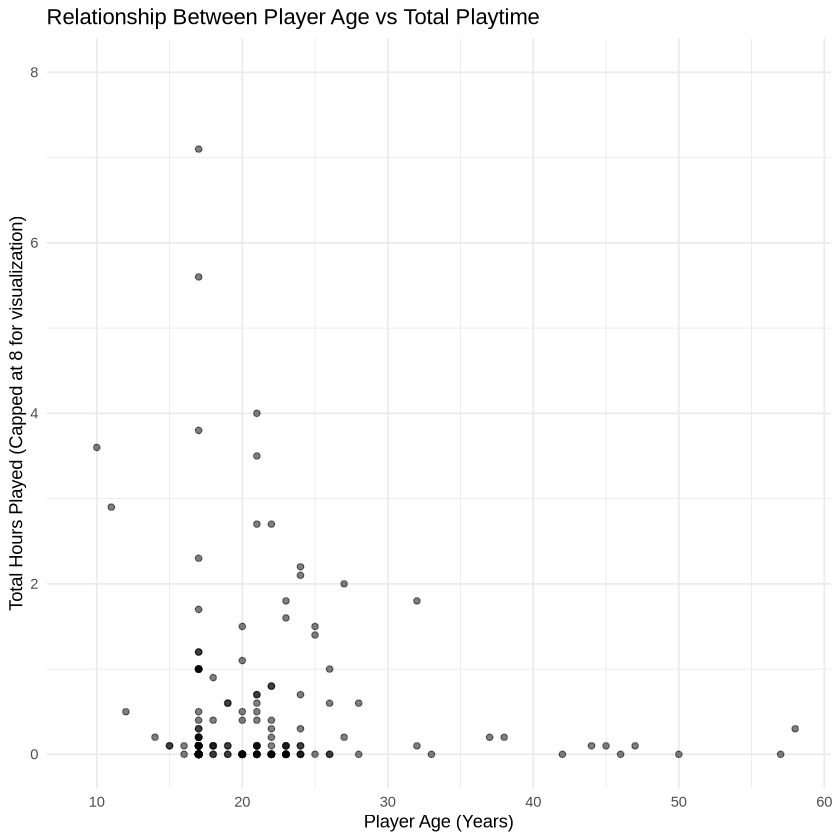

In [6]:
# Load necessary libraries (assuming they are loaded from Step 1: readr, dplyr, ggplot2)
library(ggplot2)

players <- read_csv("data/players.csv")

plot_experience_hours <- players |>
  filter(!is.na(played_hours)) |>
  # Ensure experience is factored for a consistent, logical plotting order
  mutate(experience = factor(experience, levels = c("Beginner", "Regular", "Amateur", "Pro", "Veteran"))) |>
  ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(outlier.shape = NA) + 
  coord_cartesian(ylim = c(0, 2.5)) + # limits Y-axis for vis 
  labs(
    title = "Playtime Distribution vs Player Experience Levels",
    x = "Player Experience Level",
    y = "Total Hours Played (Capped at 2.5 for visualization)",
    fill = "Experience"
  ) +
  theme_minimal()

plot_experience_hours

plot_age_hours <- players |>
  filter(!is.na(played_hours) & !is.na(Age)) |>
  ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) + # Use transparency for overlapping points
  coord_cartesian(ylim = c(0, 8)) + 
  labs(
    title = "Relationship Between Player Age vs Total Playtime",
    x = "Player Age (Years)",
    y = "Total Hours Played (Capped at 8 for visualization)"
  ) +
  theme_minimal()

plot_age_hours

## (4) Methods and Plan

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?



### 4.0 Why is this method appropriate?
- Logistic regression is the model that is used for binary classification, making it the most interpretable choice. I can directly estimate the probability of a player being a high_contributor based on their characteristics. The resulting coefficienet show which increase the odds of high contribution (e.g. being a "Pro", or younger). This directly addresses the "which kind of players" stipulation of my broader question.
- k-NN Classification: Is a non-parametric, non-linear that makes no assumptions. This is used to see if there is any pattern or relationship too complex (or otherwise not seen with the choice of characteristics chosen to observe players) for Logistic regression.
### 4.1 What assumptions are required? 
- Logistic Regression - response variable must be binary (high_contributor = binary); Exploratory variables must have no multicollinearity. 
- k-NN Regression - No parametric assumptions; assumes similar points are close features in space - therefore must standardize data. 
### 4.2 What are the potential limitations or weaknesses of the method selected?
- Logistic regression: The performance is very limited if the relationship between characteristics is extremely non-linear. 
k-nn regression: Very computationally expensive, and a black box. There may be accuracy but, insight into why a prediction was made can be hard to discern. 
### 4.3 How are you going to compare and select the model?
- The aim is to identify players to target. False positives (recruiting low contributors), and false negatives(missing high contributors) are an expensive mistake. 
I will try to balance, and optimize between precision and recall (thereby finding balance between poor prediction, and finding all true targets).
The models will be compared based on their F1-score on an unseen test set.
- For k-NN, the value k will be tuned during cross validation to optimize.
### 4.5 How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
1. Split the player data (prop = 80%), then wrangle it such that it is normalized (for k-nn).
2. Then I will perform a 10-fold cross validation to the trainig set. This will find the optimal k value.
3. Finally, the tuned models will be run on the 20% Test Set to have an assessment of the predictive performance. 

### (5) GitHub Repository

Provide the link to your GitHub repository for the project. You must have at least five commits with a description of the work that has been done towards completion of the individual report in the commit history of this repository. 

https://github.com/mackoshkamacka/individual_project_dsci/tree/main